In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML

import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [4]:
ERA5_Coarse = "/content/drive/MyDrive/Datasets2023/ERA5/ERA5_Coarse.nc"

era = xr.open_dataset(ERA5_Coarse)

era

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 756, latitude: 180, longitude: 360)
Coordinates:
  * longitude  (longitude) float32 1kB 0.375 1.375 2.375 ... 357.4 358.4 359.4
  * latitude   (latitude) float32 720B 89.62 88.62 87.62 ... -88.38 -89.38
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float64 392MB ...
    v10        (time, latitude, longitude) float64 392MB ...
    sst        (time, latitude, longitude) float64 392MB ...
    sp         (time, latitude, longitude) float64 392MB ...
    t2m        (time, latitude, longitude) float64 392MB ...
    tp         (time, latitude, longitude) float64 392MB ...
    t2m_F      (time, latitude, longitude) float32 196MB ...

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
era['t2m_F']=(era['t2m']-273.15)*1.8 + 32

era['t2m_F'].attrs['long_name']='2m temperature'
era['t2m_F'].attrs['units']='Fahrenheit'
era['t2m_F'].attrs['formula']='(K-273.15) x 1.8 + 32'

era['t2m_F']

<xarray.DataArray 't2m_F' (time: 756, latitude: 180, longitude: 360)> Size: 392MB
array([[[-20.08263   , -20.07628249, -20.06993498, ..., -20.1048463 ,
         -20.09849879, -20.09215127],
        [-20.42222193, -20.39048437, -20.35557305, ..., -20.47934955,
         -20.46348077, -20.44761199],
        [-20.36192056, -20.31748797, -20.27622914, ..., -20.46665452,
         -20.43491696, -20.40000564],
        ...,
        [-16.71210075, -16.85174603, -16.98821755, ..., -16.38520384,
         -16.4899378 , -16.591498  ],
        [-17.95621324, -18.02920964, -18.10537979, ..., -17.75626659,
         -17.81974172, -17.8863906 ],
        [-18.56240071, -18.57509573, -18.584617  , ..., -18.52431563,
         -18.53701065, -18.54970568]],

       [[-26.32540877, -26.32858253, -26.32858253, ..., -26.32223501,
         -26.32223501, -26.32540877],
        [-26.23654359, -26.23019608, -26.22067481, ..., -26.22702232,
         -26.23019608, -26.23336984],
        [-25.59861856, -25.57322851, -25.55101222, ..., -25.7922177 ,
         -25.72874257, -25.65574618],
...
        [-31.4510253 , -31.50815291, -31.56210677, ..., -31.35263885,
         -31.3780289 , -31.40659271],
        [-32.69196403, -32.71418033, -32.73639662, ..., -32.64753145,
         -32.66022647, -32.6729215 ],
        [-33.44097054, -33.42827551, -33.421928  , ..., -33.46001307,
         -33.45366556, -33.44731805]],

       [[ -8.72692974,  -8.736451  ,  -8.74597227, ...,  -8.71106095,
          -8.71740847,  -8.72058222],
        [ -7.09879272,  -7.12735653,  -7.15909409, ...,  -7.00992754,
          -7.03849135,  -7.06705516],
        [ -5.70551368,  -5.77216256,  -5.84833271, ...,  -5.58491094,
          -5.62616977,  -5.66108109],
        ...,
        [-13.0718022 , -13.16384113, -13.25588007, ..., -12.85916052,
         -12.9258094 , -12.99245829],
        [-13.53199687, -13.57642946, -13.6240358 , ..., -13.41774164,
         -13.45265296, -13.49073804],
        [-14.05884043, -14.06836169, -14.07788296, ..., -14.03027662,
         -14.03979789, -14.04931916]]])
Coordinates:
  * longitude  (longitude) float32 1kB 0.375 1.375 2.375 ... 357.4 358.4 359.4
  * latitude   (latitude) float32 720B 89.62 88.62 87.62 ... -88.38 -89.38
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2021-12-01
Attributes:
    long_name:  2m temperature
    units:      Fahrenheit
    formula:    (K-273.15) x 1.8 + 32

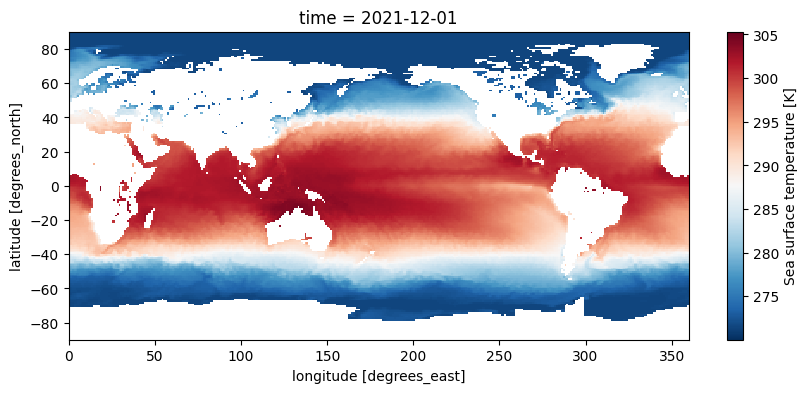

In [7]:
plt.figure(figsize=(10,4))
era.isel(time=-1)['sst'].plot(cmap='RdBu_r')
plt.savefig('sst.png')

In [8]:
sst_video=era['sst'].sel(time=slice("2020", "2022"))-273.15

def animation_func(i):
    fig.clear()
    ax = plt.axes(projection=ccrs.PlateCarree())
    sst_video.isel(time=i).plot(cmap='RdBu_r',vmin=0, vmax=30)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)

    plt.axis('off')

fig = plt.figure(figsize=(10,4))
animation = FuncAnimation(fig, animation_func,
                          frames = len(sst_video.time))

animation.save('sst.mp4')
plt.close()

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


In [9]:
Video('sst.mp4')

In [10]:
from base64 import b64encode

def show_video(video_path, video_width = 800):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [11]:
show_video('sst.mp4')

In [12]:
tp_video=era['tp'].sel(time=slice("2020", "2022"))

def animation_func(e):
    fig.clear()
    ax = plt.axes(projection=ccrs.PlateCarree())
    tp_video.isel(time=e).plot(cmap='RdBu_r',vmin=0, vmax=0.5)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)

    plt.axis('off')

fig = plt.figure(figsize=(10,4))
animation = FuncAnimation(fig, animation_func,
                          frames = len(tp_video.time))

animation.save('tp.mp4')
plt.close()

show_video('tp.mp4')

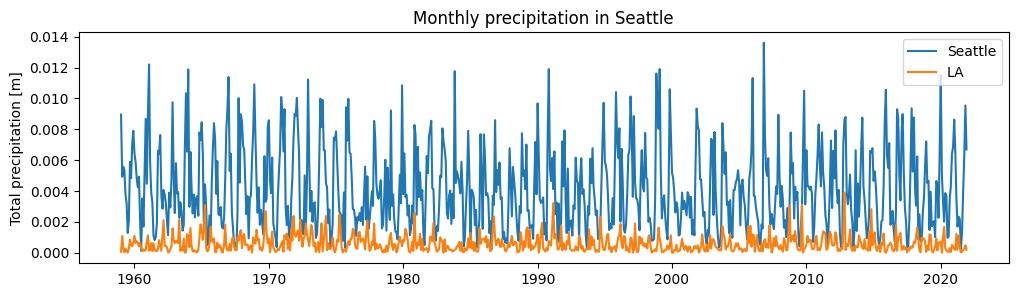

In [13]:
Lat_Seattle=47.6062
Lon_Seattle=360-122.3321

Lat_LA=34.0522;
Lon_LA= -118.2437


era_Seattle=era.sel(longitude=Lon_Seattle,
                    latitude=Lat_Seattle,
                    method="nearest")

era_LA=era.sel(longitude=Lon_LA,
                    latitude=Lat_LA,
                    method="nearest")


plt.figure(figsize=(12, 3))
era_Seattle['tp'].plot(label='Seattle')
era_LA['tp'].plot(label='LA')
plt.xlabel(''); plt.title('Monthly precipitation in Seattle');
plt.legend()


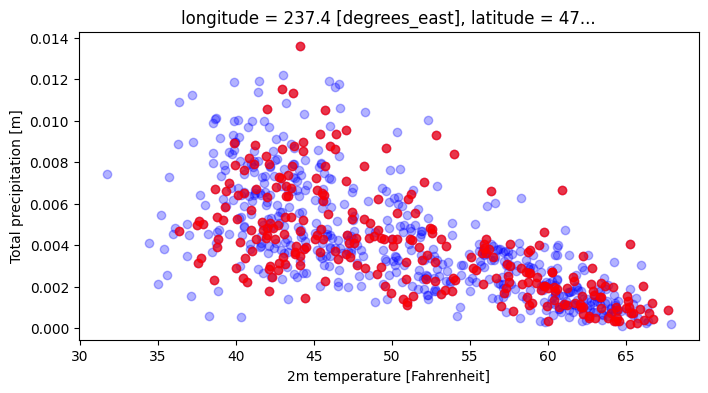

In [14]:
era_Seattle_recent=era_Seattle.sel(time=slice("2000-01", "2022-01"))

plt.figure(figsize=(8,4))
era_Seattle.plot.scatter(x='t2m_F',y='tp',color='blue',alpha=0.3)
era_Seattle_recent.plot.scatter(x='t2m_F',y='tp',color='red',alpha=0.7);

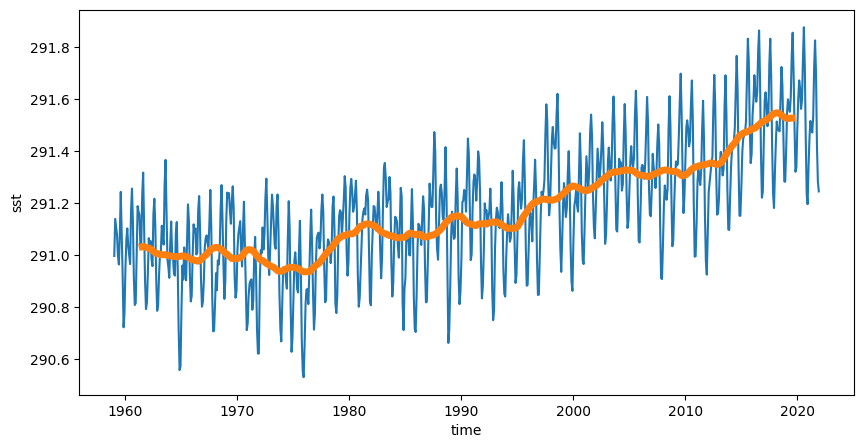

In [16]:
sst=era['sst']

weights = np.cos(np.deg2rad(era.latitude)); weights.name = "weights"

SST_global_mean = sst.weighted(weights).mean(dim=['latitude','longitude'])


SST_global_mean_runningMean=SST_global_mean.rolling(time=12*5,center=True).mean()
plt.figure(figsize=(10,5))
SST_global_mean.plot(label="SST" )
SST_global_mean_runningMean.plot(label="SST rolling mean", linewidth=5 );

In [17]:
era_clim=era.groupby("time.month").mean('time')

In [18]:
era_a = era.groupby("time.month")-era_clim

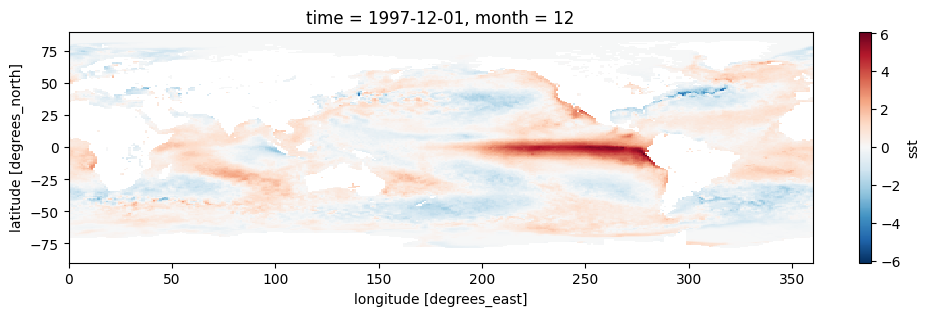

In [19]:
plt.figure(figsize=(12, 3))
era_a['sst'].sel(time='1997-12').plot(cmap='RdBu_r')
plt.savefig('a.png')

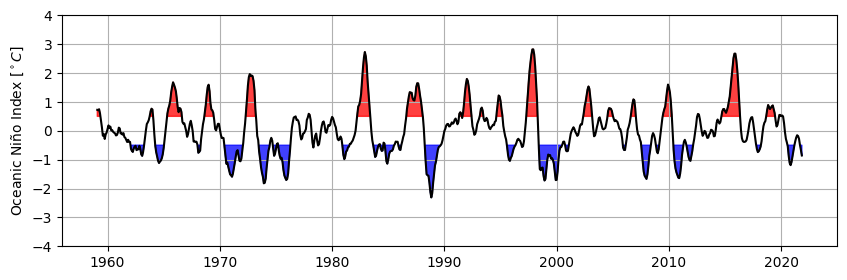

In [21]:
NINO34 = era_a['sst'].sel(latitude=slice(5,-5),
                  longitude=slice(190,240)).weighted(weights).mean(dim=['latitude','longitude'])

ONI= NINO34.rolling(time=3,center=True).mean()

plt.figure(figsize=(10,3))
ax=plt.gca()
plt.plot(ONI.time, ONI,'k')
ax.fill_between(ONI.time.data, 0.5, ONI, ONI> 0.5, color='red', alpha=.75)
ax.fill_between(ONI.time.data, -0.5, ONI, ONI< -0.5, color='blue',  alpha=.75)
plt.ylim((-4,4))
plt.grid(visible=True)
plt.ylabel('Oceanic Niño Index [$^\circ C$]');

In [25]:
x=ONI.data; y=SSTa_global_mean_Detrended.data
x=x[~np.isnan(y)];  y=y[~np.isnan(y)]

correlation = np.corrcoef(x, y)[0,1]

print('correlation = ', correlation)

correlation =  0.6243329244725099
